#### Deep Learning and Artifical Networks Basics
- Forward Propagation: Neural Networks make predictions on data
- Bank Transactions Example:


- 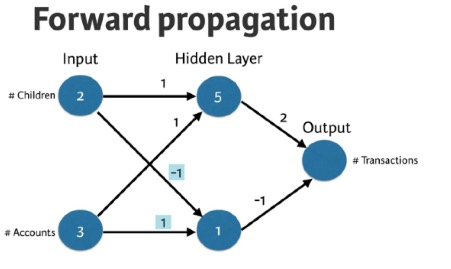

- We use the same multiply and add process
- Dot Product : Algebraically, the dot product is the sum of the products of the corresponding entries of the two sequences of numbers.

In [7]:
# Code 
# import numpy 
import numpy as np

# input data
input_data = np.array([2,3])

# weights
weights = {'node_0':np.array([1,1]),
          'node_1':np.array([-1,1]),
          'output':np.array([2,-1])}

node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

# hidden layers values
hidden_layer_values = np.array([node_0_value, node_1_value])

print('hidden layer values=', hidden_layer_values)

# output 
output = (hidden_layer_values * weights['output']).sum()

print('output=', output)

hidden layer values= [5 1]
output= 9


#### Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

Ch1Ex4

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].

The weights feeding into the output node are available in weights['output'].

NumPy will be pre-imported for you as np in all exercises.

In [8]:
input_data = np.array([3,5])

# weights
weights = {'node_0':np.array([2,4]),
          'node_1':np.array([4,-5]),
          'output':np.array([2,7])}

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


#### Activation Function
- Activation Function allows to capute linear vs non linear functions
- Activation Function is applied to node inputs to produce node output
- From the previous example
    - 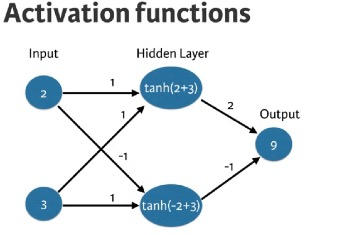
- Rectified Linear Activation function (ReLU)
    - RELU(x) = { 0 if x<0 | x if x>=0

In [9]:
# Activation Functions

import numpy as np

input_data = np.array([-1,2])

# weights
weights = {'node_0':np.array([3,3]),
          'node_1':np.array([1,5]),
          'output':np.array([2,-1])}

# Calculate node 0 value: node_0_value
node_0_input = (input_data * weights['node_0']).sum()

# calculate node 0 value: node_0_output
node_0_output = np.tanh(node_0_input)

# node_1_input
node_1_input = (input_data * weights['node_1']).sum()

#node_1_output
node_1_output = np.tanh(node_1_input)

hidden_layer_output = np.array([node_0_output, node_1_output])

output = (hidden_layer_output * weights['output']).sum()

print('output=', output)

output= 0.9901095378334199


The Rectified Linear Activation Function
As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3 
relu(-3) = 0 

In [10]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

-3


Applying the network to many observations/rows of data
You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

In [11]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[0, 12]


#### Deep Networks
- 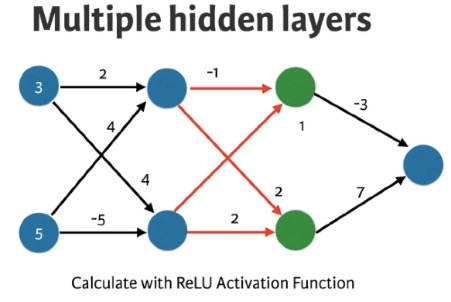
- Calculate with ReLU Activation Function

#### Representing Learning
- Deep Networks internally build representations of patterns in the data.
- Partially replace the need for feature engineering.
- Subsequent layers build increasingly sophisticated representation of raw data.

#### Deep learning
- Modeler doesn't need to specify the interactions
- When you train the model, the neural network gets weights that find the relevant patterns to make better predictions.
- 

Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output']

In [13]:
import numpy as np
input_data = np.array([3,5])

weights = {'node_0_0':np.array([2,4]),
          'node_0_1':np.array([4,-5]),
           'node_1_0':np.array([-1,2]),
           'node_1_1':np.array([1,2]),
          'output':np.array([2,7])}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)



182
